In [38]:
import numpy as np
import os

# [최종 코드 제출 전 주석 처리 제거] 출력이 너무 길어 잠시 주석 처리하였음
#for dirname, _, filenames in os.walk('.\\input_temp'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [39]:
import pandas as pd

import os
import shutil
from sklearn.model_selection import train_test_split

# 해당 셀은 full dataset(전체 데이터)을 data를 category별 6:2:2로 split한다.
# split된 data는 각각 training/해당category, valivation/해당category, test/해당category 에 저장된다. 

# full dataset 디렉토리
dataset_dir = './input_temp'

if(os.path.isdir('./dataset')):
    print(f"dataset 디렉토리가 이미 존재하여 새로운 dataset 디렉토리를 만들기 전, 삭제하였습니다. ")
    shutil.rmtree('./dataset')

# train 디렉토리와 validation 디렉토리와 test 디렉토리 생성
train_dir = './dataset/training'
val_dir = './dataset/validation'
test_dir = './dataset/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
print("새로운 dataset 디렉토리를 생성하였습니다.")
print()

categories = ['Dumbells', 'Elliptical Machine', 'Recumbent Bike']
category_num = len(categories)

# Category별로 복사
for category in categories :
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    category_path = os.path.join(dataset_dir, category)

    # Check if category path exists
    if not os.path.exists(category_path):
        print(f"Path {category_path} does not exist ")

    # Keep all files in category directory by list files_in_category
    files_in_category = [file for file in os.listdir(category_path) if os.path.join(category_path, file)]

    # split files by 6:2:2
    train_files, val_files = train_test_split(files_in_category, test_size=0.4, random_state=42)
    val_files, test_files = train_test_split(val_files, test_size=0.5, random_state=42)

    
    # Copy train files into ./dataset/training and ./dataset/validation and ./dataset/test
    for file in train_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    print(f"{category_path}에서 {os.path.join(train_dir, category)}로 파일 {len(train_files)}개가 복사되었습니다.")
    
    for file in val_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(val_dir, category, file))
    print(f"{category_path}에서 {os.path.join(val_dir, category)}로 파일 {len(val_files)}개가 복사되었습니다.")
    
    for file in val_files:
        shutil.copy(os.path.join(category_path, file), os.path.join(test_dir, category, file))
    print(f"{category_path}에서 {os.path.join(test_dir, category)}로 파일 {len(test_files)}개가 복사되었습니다.")
    print()


# category 확인
print(f"category의 개수는 {category_num}개이고, ")
print("category는 다음과 같습니다")
for cat in categories:
    print(f"{cat} ")
print()

dataset 디렉토리가 이미 존재하여 새로운 dataset 디렉토리를 만들기 전, 삭제하였습니다. 
새로운 dataset 디렉토리를 생성하였습니다.

./input_temp\Dumbells에서 ./dataset/training\Dumbells로 파일 564개가 복사되었습니다.
./input_temp\Dumbells에서 ./dataset/validation\Dumbells로 파일 188개가 복사되었습니다.
./input_temp\Dumbells에서 ./dataset/test\Dumbells로 파일 189개가 복사되었습니다.

./input_temp\Elliptical Machine에서 ./dataset/training\Elliptical Machine로 파일 210개가 복사되었습니다.
./input_temp\Elliptical Machine에서 ./dataset/validation\Elliptical Machine로 파일 70개가 복사되었습니다.
./input_temp\Elliptical Machine에서 ./dataset/test\Elliptical Machine로 파일 71개가 복사되었습니다.

./input_temp\Recumbent Bike에서 ./dataset/training\Recumbent Bike로 파일 100개가 복사되었습니다.
./input_temp\Recumbent Bike에서 ./dataset/validation\Recumbent Bike로 파일 33개가 복사되었습니다.
./input_temp\Recumbent Bike에서 ./dataset/test\Recumbent Bike로 파일 34개가 복사되었습니다.

category의 개수는 3개이고, 
category는 다음과 같습니다
Dumbells 
Elliptical Machine 
Recumbent Bike 



In [40]:
import tensorflow as tf

# Image 처리용
#from tensorflow.keras.processing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Model 생성용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model layer용
from tensorflow.keras import layers

# Optimizer용
from tensorflow.keras.optimizers import Adam

# Preprocessing

# train_dir, val_dir path 
train_dir = './dataset/training'
val_dir = './dataset/validation'


# Image 처리
# train_dir/어떤category, val_dir/어떤category 안에 있는 이미지들을 해당 category로 labeling 해줌
# model.fit에서 사용되는 batch_size로 배치 크기 설정 

train_dataset = image_dataset_from_directory(
    directory = train_dir,
    image_size = (150, 150),
    batch_size = 32,
    label_mode='categorical',
    shuffle = True
)

val_dataset = image_dataset_from_directory(
    directory = val_dir,
    image_size = (150, 150),
    label_mode='categorical',
    batch_size = 32,
)

for images, labels in train_dataset.take(1):  # Take one batch
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("Labels:", labels)

Found 874 files belonging to 3 classes.
Found 291 files belonging to 3 classes.
Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 3)
Labels: tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]], shape=(32, 3), dtype=float32)


In [41]:
# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255),       # RGB normalize
    layers.RandomFlip("horizontal"),   # 좌우 반전
    layers.RandomRotation(0.2),        # 회전
    layers.RandomZoom(0.2),            # 확대, 축소
    layers.RandomTranslation(0.1, 0.1) # 좌우 이동
])

# Define Model 

# [최종 코드 제출 전 검토]모델 생성 방법 주석 처리
# CNN으로 3 X 3 filter 32개 사용 
# MaxPooling
# FC Layer (hidden units : 128)
# FC Layer (hidden units : category 개수)

model = Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(category_num, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

# Train 
history = model.fit(train_dataset, 
         validation_data = val_dataset,
         epochs=50,
         verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.4267 - loss: 14.2625 - val_accuracy: 0.6220 - val_loss: 0.9069
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.4764 - loss: 1.0368 - val_accuracy: 0.6460 - val_loss: 0.9563
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.6221 - loss: 0.8297 - val_accuracy: 0.6426 - val_loss: 0.9295
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.6621 - loss: 0.7871 - val_accuracy: 0.6667 - val_loss: 0.7451
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.6691 - loss: 0.8231 - val_accuracy: 0.7182 - val_loss: 0.6774
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.6868 - loss: 0.7693 - val_accuracy: 0.8110 - val_loss: 0.4844
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.7502 - loss: 0.6676 - val_accuracy: 0.8419 - val_loss: 0.4847
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.7257 - loss: 0.6695 - val_accuracy: 

In [42]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 175232)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │      22,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,293,323 (256.70 MB)

 Trainable params: 22,431,107 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 44,862,216 (171.14 MB)

In [43]:
# [최종 코드 제출 전 해당 셀 삭제]
history.history

{'accuracy': [0.47826087474823,
  0.5617849230766296,
  0.6441647410392761,
  0.6670480370521545,
  0.6910755038261414,
  0.7288329601287842,
  0.7585812211036682,
  0.7505720853805542,
  0.7837528586387634,
  0.8009153604507446,
  0.7997711896896362,
  0.8123570084571838,
  0.790617823600769,
  0.7929061651229858,
  0.8089244961738586,
  0.8169336318969727,
  0.8032036423683167,
  0.8066361546516418,
  0.8375285863876343,
  0.8146452903747559,
  0.8226544857025146,
  0.8203661441802979,
  0.823798656463623,
  0.8260869383811951,
  0.8375285863876343,
  0.8375285863876343,
  0.8318077921867371,
  0.8318077921867371,
  0.8295194506645203,
  0.8398169279098511,
  0.8352402448654175,
  0.8295194506645203,
  0.8295194506645203,
  0.8443936109542847,
  0.823798656463623,
  0.8363844156265259,
  0.8329519629478455,
  0.8627002239227295,
  0.8501144051551819,
  0.8352402448654175,
  0.8489702343940735,
  0.8409610986709595,
  0.8604118824005127,
  0.8409610986709595,
  0.8604118824005127,
  0

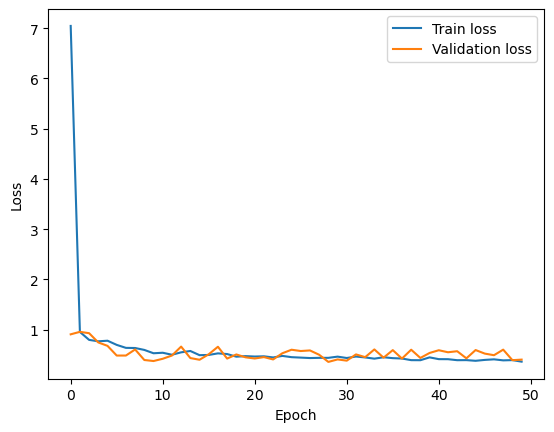

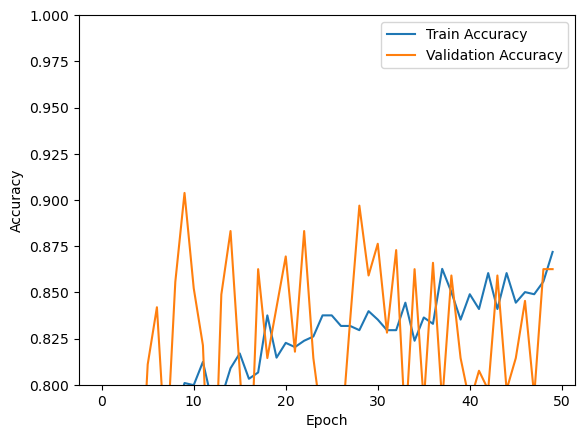

In [44]:
# Visualize the Results
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()
plt.show()

In [45]:
# 가장 정확도가 높은 모델로 test data predict하고 Visualize (confusion matrix)
# test data image visualize와 함께 predict label과 actual label 표기

# Test data predication 을 통해 최종 accuracy 확인

# test_dir path 
test_dir = './dataset/test'

test_dataset = image_dataset_from_directory(
    directory = test_dir,
    image_size = (150, 150),
    label_mode='categorical',
    batch_size=80
)


all_labels = []
for _, labels in test_dataset:
    all_labels.append(np.argmax(labels.numpy(), axis=1))
all_labels = np.concatenate(all_labels, axis=0)  

y_pred = np.argmax(model.predict(test_dataset), axis=1)

#for label in y_pred:
#    print(categories[label])

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(all_labels, y_pred)
print(accuracy)


Found 291 files belonging to 3 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
0.44329896907216493
